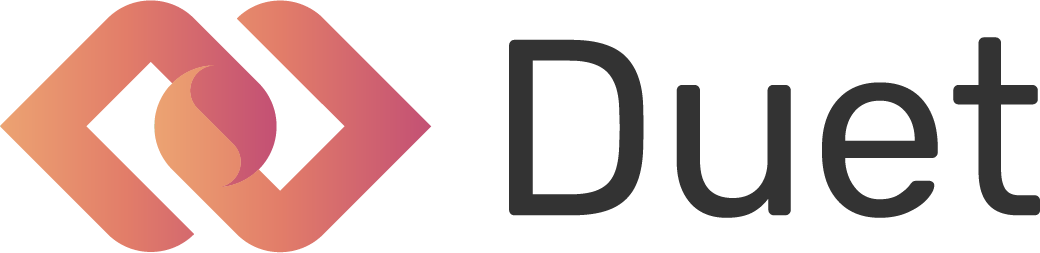

🎤  🎸  ♪♪♪ Joining Duet ♫♫♫  🎻  🎹

♫♫♫ > DISCLAIMER: Duet is an experimental feature currently in beta.
♫♫♫ > Use at your own risk.


    > ❤️ Love Duet? Please consider supporting our community!
    > https://github.com/sponsors/OpenMined

♫♫♫ > Punching through firewall to OpenGrid Network Node at:
♫♫♫ > http://ec2-18-216-8-163.us-east-2.compute.amazonaws.com:5000
♫♫♫ >
♫♫♫ > ...waiting for response from OpenGrid Network... 
♫♫♫ > DONE!

♫♫♫ > CONNECTED!


In [1]:
import syft as sy
duet = sy.join_duet(loopback=True)

In [2]:
class SyNet(sy.Module):
    def __init__(self, torch_ref):
        super(SyNet, self).__init__(torch_ref=torch_ref)
        self.lin = self.torch_ref.nn.Linear(2,2)

    def forward(self, x):
        x = self.lin(x)
        return x

In [3]:
import torch
model1 = SyNet(torch)
model1_ptr = model1.send(duet)

In [4]:
opt1 = duet.torch.optim.SGD(params=model1_ptr.parameters(),lr=0.1)

In [5]:
duet.store.pandas

ID       Tags            Description  \
0  <UID: 5e50346ba30e4afa90c0a1a87ead612f>  [dataset]  simple binary dataset   

              object_type  
0  <class 'torch.Tensor'>

In [6]:
data_pointer = duet.store[0]

In [7]:
model2 = torch.nn.Linear(2,1)
opt2 = torch.optim.SGD(params=model2.parameters(), lr=0.1)

target = torch.tensor([[0],[0],[1],[1.]])

In [8]:
for iter in range(20):
    opt1.zero_grad()
    opt2.zero_grad()
    
    activation_ptr = model1_ptr(data_pointer)
    activation = activation_ptr.clone().get(request_block=True)
    
    pred = model2(activation)
    loss = ((pred - target)**2).sum()
    loss.backward()
    
    grad_ptr = activation.grad.clone().send(duet)
    activation_ptr.backward(grad_ptr)
    
    opt1.step()
    opt2.step()
    
    print(loss)


tensor(2.8811, grad_fn=<SumBackward0>)
tensor(1.9899, grad_fn=<SumBackward0>)
tensor(1.6243, grad_fn=<SumBackward0>)
tensor(1.2836, grad_fn=<SumBackward0>)
tensor(1.1335, grad_fn=<SumBackward0>)
tensor(1.0344, grad_fn=<SumBackward0>)
tensor(0.9573, grad_fn=<SumBackward0>)
tensor(0.8847, grad_fn=<SumBackward0>)
tensor(0.8083, grad_fn=<SumBackward0>)
tensor(0.7234, grad_fn=<SumBackward0>)
tensor(0.6279, grad_fn=<SumBackward0>)
tensor(0.5229, grad_fn=<SumBackward0>)
tensor(0.4129, grad_fn=<SumBackward0>)
tensor(0.3055, grad_fn=<SumBackward0>)
tensor(0.2097, grad_fn=<SumBackward0>)
tensor(0.1325, grad_fn=<SumBackward0>)
tensor(0.0770, grad_fn=<SumBackward0>)
tensor(0.0413, grad_fn=<SumBackward0>)
tensor(0.0206, grad_fn=<SumBackward0>)
tensor(0.0097, grad_fn=<SumBackward0>)
